In [4]:
import numpy as np
from matplotlib import pyplot as plt
import pickle, os

In [13]:
def sample_seg(min_seg_len, max_seg_len, min_slope, max_slope):
    seg_len = np.random.uniform(min_seg_len, max_seg_len)
    seg_slope = np.random.uniform(min_slope, max_slope)
    return seg_len, seg_slope

def ground(initx = 0, inity = 0.1, maxx = 1.25, miny = 0.0, maxy = 0.5, min_seg_len = 0.02, max_seg_len = 0.07, min_slope = -0.5, max_slope = 0.5, savepath = "C:\\GitHub\\ELDiR\\terrain.npy"):
    begx = [-100]
    begy = [inity]
    lens = [100 + initx]
    slopes = [0]
    shifts = [inity]
    x = initx
    y = inity

    while x < maxx:
        begx.append(x)
        begy.append(y)
        seg_len, seg_slope = sample_seg(min_seg_len, max_seg_len, min_slope, max_slope)
        seg_slope = seg_slope + 0.2
        tmp_y = y + seg_slope * seg_len
        while tmp_y < miny or tmp_y > maxy:
            seg_len, seg_slope = sample_seg(min_seg_len, max_seg_len, min_slope, max_slope)
            tmp_y = y + seg_slope * seg_len
        lens.append(seg_len)
        slopes.append(seg_slope)
        b = y - seg_slope * x
        shifts.append(b)
        y = y + seg_slope * seg_len
        x += seg_len
    
    begx.append(x)
    begy.append(y)
    lens.append(100)
    slopes.append(0)
    shifts.append(y)
    begx = np.array(begx)
    begy = np.array(begy)
    lens = np.array(lens)
    slopes = np.array(slopes)
    shifts = np.array(shifts)
    if savepath is not None:
        print(f"Saving data to {savepath}...")
        np.save(savepath, [begx, begy, lens, slopes, shifts])
        print("Data saved successfully.")

    return begx, begy, lens, slopes, shifts

def sample_points(n_points = 10, initx = 0.0, inity = 0.1, maxx = 1.25, miny = 0.0, maxy = 0.5, max_variation = 0.15):
    xs = np.linspace(initx, maxx, n_points)
    ys = [None] * n_points

    ys[0] = inity
    for i in range(n_points - 1):
        ys[i + 1] = ys[i] + np.random.uniform(-max_variation, max_variation)
        while ys[i+1] > maxy or ys[i+1] < miny:
            ys[i + 1] = ys[i] + np.random.uniform(-max_variation, max_variation)
    return xs, ys

def fit_slopes(xs, ys, n_points):
    slopes = [None] * (n_points - 1)
    shifts = [None] * (n_points - 1)

    for i in range(n_points - 1):
        slopes[i] = (ys[i+1] - ys[i]) / (xs[i+1] - xs[i])
        shifts[i] = ys[i] - (slopes[i]*xs[i])
    
    return slopes, shifts

def ground_height_at(xs, ys, x):
    y = np.interp(x, xs, ys)

    return y

def visualize_ground(xs, ys, initx  = 0.0, maxx = 1.25, n_points = 50):
    begx = [None] * (n_points - 1)
    begy = [None] * (n_points - 1)
    lens = [None] * (n_points - 1)

    x = np.linspace(initx, maxx, n_points)
    y = np.interp(x, xs, ys)

    for i in range(n_points - 1):
        begx[i] = x[i]
        begy[i] = y[i]
        lens[i] = x[i+1] - x[i]
    
    slopes, shifts = fit_slopes(x, y, n_points)

    begx = np.array(begx)
    begy = np.array(begy)
    lens = np.array(lens)
    slopes = np.array(slopes)
    shifts = np.array(shifts)

    return begx, begy, lens, slopes, shifts

def compute_r2(y_true, y_predicted):
    sse = sum((y_true - y_predicted)**2)
    tse = (len(y_true) - 1) * np.var(y_true, ddof=1)
    r2_score = 1 - (sse / tse)
    return r2_score

def xsample_points(maxx, miny, maxy):
    x = []
    y = []

    x = np.linspace(0, maxx, 10)
    
    for i in range(10):
        y.append(np.random.uniform(miny, maxy))
    
    return x, y


def polyfit_ground(max_x = 1.25, min_y = 0.0, max_y = 0.5, min_acc = 0.94):
    x, y = sample_points(max_x, min_y, max_y)
    r2 = 0
    deg = 9
    max_deg = 15
    curve = []

    #Increases the degree of the polynomial until a certain r-squared value is achieved
    while r2 < min_acc and deg <= max_deg:
        curve = np.polyfit(x, y, deg)
        pred_y = np.polyval(curve, x)
        r2 = compute_r2(y, pred_y)
        print(r2)
        deg += 1
    return curve, x, y
    


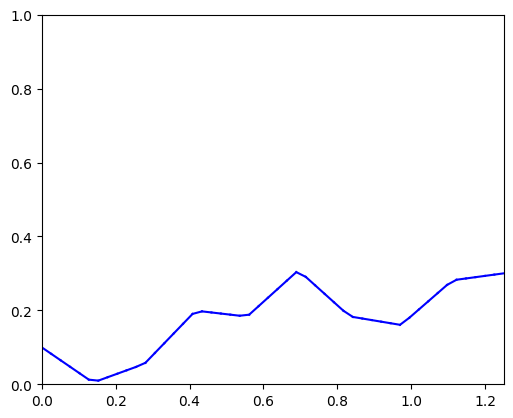

In [19]:
x, y = sample_points()

np.save('ground_sample_points.npy', [x, y])

xs, ys, lens, slopes, shifts = visualize_ground(x, y)
n_ground_segs = len(xs)

for i in range(n_ground_segs):
    plt.plot([xs[i], xs[i] + lens[i]], [ys[i], ys[i] + lens[i] * slopes[i]], 'b')

plt.xlim(0, 1.25)             # Needs to be fixed
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')

1.0


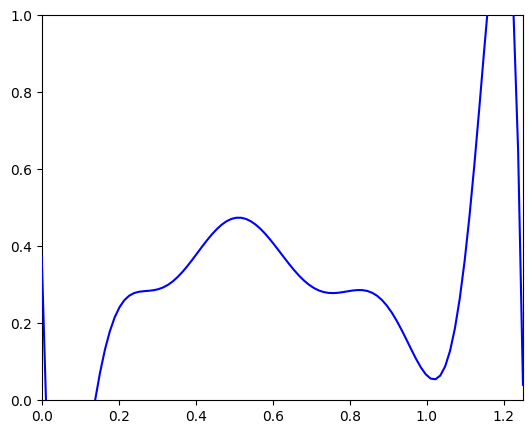

In [13]:
function, x_sampled, y_sampled = polyfit_ground()

x_curve = np.linspace(min(x_sampled), max(x_sampled), 100)
y_curve = np.polyval(function, x_curve)

fig = plt.figure(figsize=(10,5))

plt.plot(x_curve, y_curve, color='blue', label='Fitted Terrain', zorder=3)

plt.xlim(0, 1.25)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')

In [2]:
with open("/home/qpd4588/mass-spring-robo/rhino.pkl", "rb") as f:
    rhino = pickle.load(f)

Saving data to C:\GitHub\ELDiR\terrain.npy...
Data saved successfully.
31


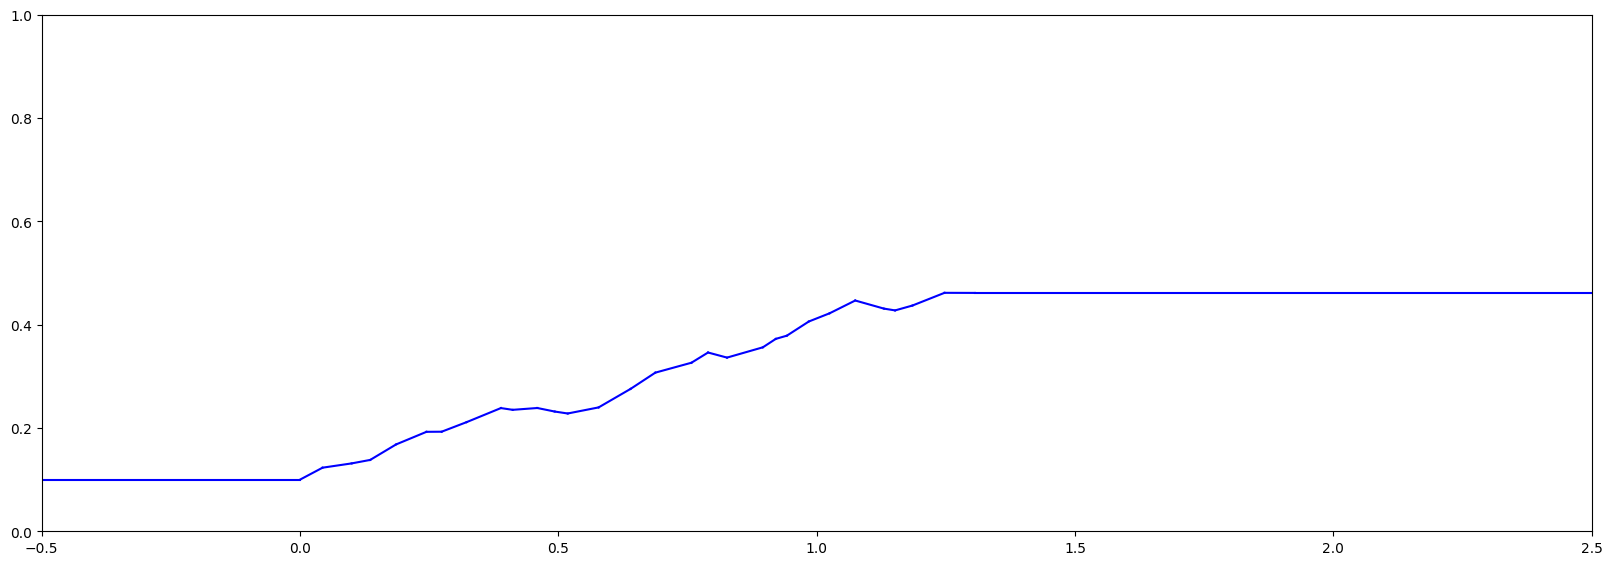

In [7]:
xs, ys, lens, slopes, shifts = ground()
n = len(xs)
print(n)

fig = plt.figure(figsize=(20, 10))

for i in range(n):
    plt.plot([xs[i], xs[i] + lens[i]], [ys[i], ys[i] + lens[i] * slopes[i]], 'b')

plt.xlim(-0.5, 2.5)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')

In [74]:
np.save("/home/qpd4588/data-out/rss-2024/terrain-evo/grounds/5.npy", [xs, ys, lens, slopes, shifts])

In [30]:
np.save("/home/qpd4588/data-out/rss-2024/terrain-evo/grounds/8.npy", [xs, ys, lens, slopes, shifts])

In [29]:
xs.shape, ys.shape, lens.shape, slopes.shape, shifts.shape

((6,), (6,), (6,), (6,), (6,))

In [28]:
xs = np.array([0., 0.3, 0.31, 0.37, 0.38, 1.25])
ys = np.array([0.1, 0.1, 0.2, 0.2, 0.1, 0.1])
lens = np.array([0.3, 0.01, 0.06, 0.01, 0.87, 1])
shifts = []
for i in range(5):
    shifts.append(ys[i] - slopes[i] * xs[i])
shifts.append(0.1)
shifts = np.array(shifts)

In [36]:
shifts.tolist()

[0.1, -2.9000000000000137, 0.2, 3.899999999999997, 0.1, 0.1]

In [37]:
xs, slopes

(array([0.  , 0.3 , 0.31, 0.37, 0.38, 1.25]),
 array([  0.,  10.,   0., -10.,   0.,   0.]))

6


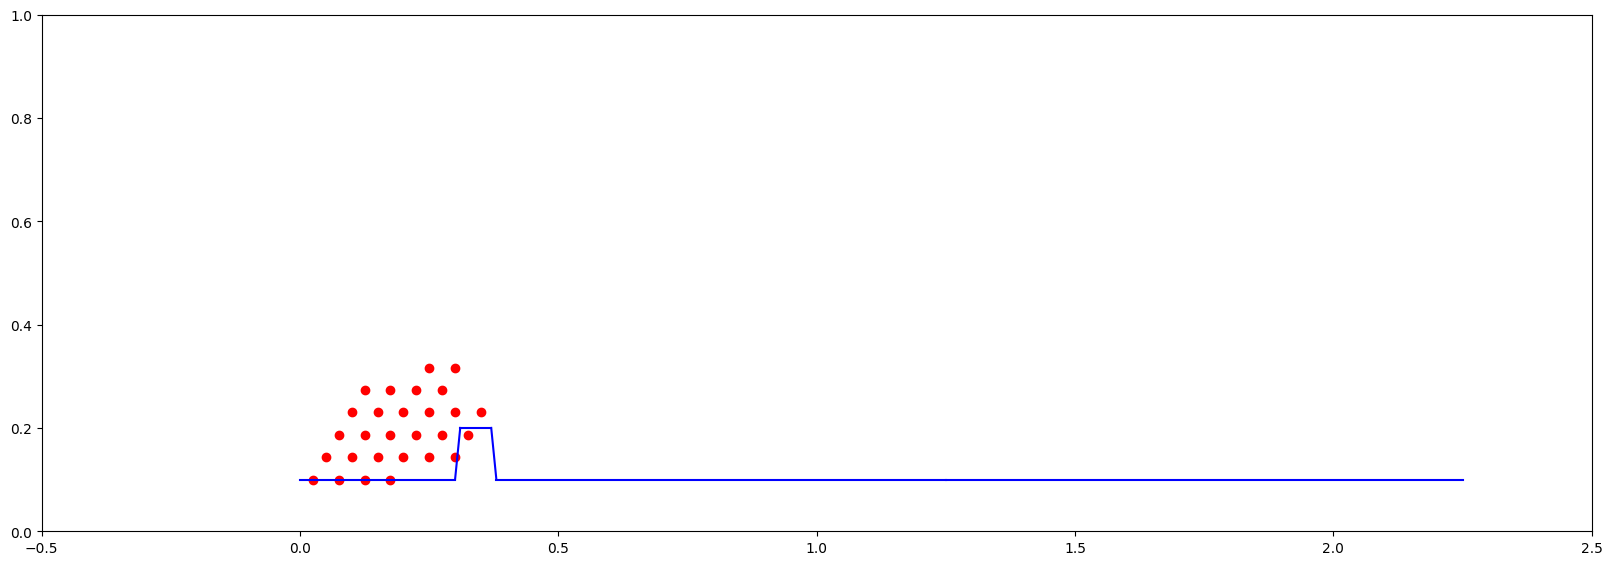

In [33]:
floor = np.load("/home/qpd4588/data-out/rss-2024/terrain-evo/grounds/8.npy")
xs, ys, lens, slopes, shifts = floor

n = len(xs)
print(n)

fig = plt.figure(figsize=(20, 10))

for x,y in rhino['points'][0]:
    plt.plot(x, y, 'ro')

for i in range(n):
    plt.plot([xs[i], xs[i] + lens[i]], [ys[i], ys[i] + lens[i] * slopes[i]], 'b')

plt.xlim(-0.5, 2.5)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')

In [8]:
# xs = [0.0, 0.45, 0.47, 0.53, 0.55, 0.75, 0.77, 0.83, 0.85, 1.25]
# ys = [0.2, 0.2,  0.0,  0.0,  0.2, 0.2,  0.0,  0.0,  0.2, 0.2]
# slopes = []
# lens = []
# shifts = []
# for i in range(len(xs) - 1):
#     slopes.append((ys[i+1] - ys[i]) / (xs[i+1] - xs[i]))
#     lens.append(xs[i+1] - xs[i])
#     shifts.append(ys[i] - slopes[i] * xs[i])

# slopes.append(0)
# lens.append(1)
# shifts.append(0.1)

# n = len(xs) - 1

# fig = plt.figure(figsize=(20, 10))

# for x,y in rhino['points'][0]:
#     plt.plot(x, y, 'ro')

# for i in range(n):
#     plt.plot([xs[i], xs[i] + lens[i]], [ys[i], ys[i] + lens[i] * slopes[i]], 'b')

In [9]:
import numpy as np


In [10]:
len(xs), len(ys), len(lens), len(slopes), len(shifts)

(30, 30, 30, 30, 30)

In [11]:
# xs = np.array(xs)
# ys = np.array(ys)
# lens = np.array(lens)
# slopes = np.array(slopes)
# shifts = np.array(shifts)

# np.save("/home/qpd4588/data-out/rss-2024/terrain-evo/grounds/8.npy", [xs, ys, lens, slopes, shifts])

In [37]:
xs

array([-1.00000000e+02,  0.00000000e+00,  2.83259843e-02,  8.25949053e-02,
        1.22800269e-01,  1.76567169e-01,  2.44579918e-01,  2.95963035e-01,
        3.49478476e-01,  3.89626098e-01,  4.18143650e-01,  4.70470662e-01,
        5.40081641e-01,  5.62197140e-01,  6.25332316e-01,  6.78395464e-01,
        7.04290376e-01,  7.57127693e-01,  8.12236590e-01,  8.49527705e-01,
        9.08543195e-01,  9.35340023e-01,  9.63274454e-01,  9.85946956e-01,
        1.00775633e+00,  1.03798446e+00,  1.08972420e+00,  1.13165047e+00,
        1.19701789e+00,  1.25825988e+00])

In [76]:
import os

In [94]:
grounds = os.listdir("/home/qpd4588/data-out/rss-2024/terrain-evo/grounds")
grounds = sorted(grounds)
print(grounds)

['1.npy', '2.npy', '3.npy', '4.npy', '5.npy', '6.npy', '7.npy']


In [95]:
grounds = [os.path.join("/home/qpd4588/data-out/rss-2024/terrain-evo/grounds", g) for g in grounds]
grounds = [np.load(g) for g in grounds]
# grounds = [g for i, g in enumerate(grounds) if not i in [2]]

0 30
1 28
2 30
3 29
4 31
5 6
6 10


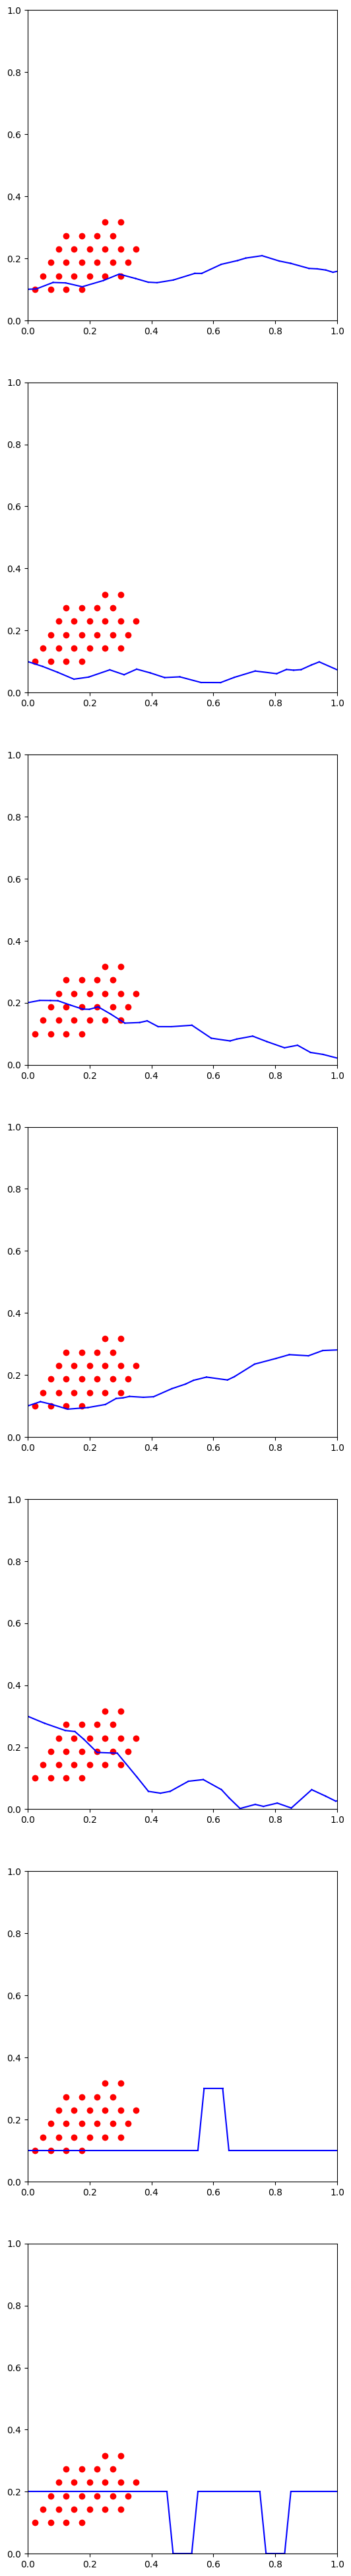

In [97]:
fig, ax = plt.subplots(len(grounds), 1, figsize=(10, 50))
for i, g in enumerate(grounds):
    xs, ys, lens, slopes, shifts = g
    n = len(xs)
    print(i, n)
    for x,y in rhino['points'][0]:
        ax[i].plot(x, y, 'ro')
    for j in range(n):
        ax[i].plot([xs[j], xs[j] + lens[j]], [ys[j], ys[j] + lens[j] * slopes[j]], 'b')
    ax[i].set_xlim(0, 1)
    ax[i].set_ylim(0, 1)
    ax[i].set_aspect('equal', adjustable='box')